<a href="https://colab.research.google.com/github/Shahidazad/Pytorch/blob/main/img_classification_use_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

  0%|          | 0/135107811 [00:00<?, ?it/s]

In [3]:
# extract from archive
with tarfile.open('./cifar10.tgz','r:gz') as tar: # for zip u have use different library
  tar.extractall(path='./data')

In [4]:
data_dir = './data/cifar10'
print(os.listdir(data_dir))
classes=os.listdir(data_dir +'/train')
print(classes)

['train', 'test']
['horse', 'frog', 'dog', 'deer', 'bird', 'automobile', 'truck', 'airplane', 'cat', 'ship']


In [5]:
airplane_files = os.listdir(data_dir+'/train/airplane')
print('number of training in airplanes',len(airplane_files))
airplane_files[:3]

number of training in airplanes 5000


['1089.png', '2155.png', '2380.png']

In [6]:
ship_test_files = os.listdir(data_dir +'/test/ship')
print('no of  test  example',len(ship_test_files))
print(ship_test_files[:4])

no of  test  example 1000
['0826.png', '0301.png', '0782.png', '0124.png']


In [7]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
dataset = ImageFolder(data_dir + '/train',transform=ToTensor())

In [9]:
img,label =dataset[0]
print(img.shape,label)  # 3 channel RGB
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [10]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
# we have to change the dimension from (3 ,32, 32) to  (32, 32, 3)
# because numpy  matplotlib have the channels at the end
import matplotlib.pyplot as plt
def show_example(img,label):
  print('Label',dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))  # reshape 32,32,3 to 3,32,32
  

Label airplane (0)


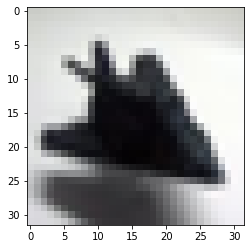

In [12]:
show_example(*dataset[0]) # unpacking *

In [13]:
def  split_indices(n,val_pct,seed=99):
  # size of  validation set
  n_val=int(val_pct*n)
  np.random.seed(seed)
  # create random permutation of 0,n-1
  idxs=np.random.permutation(n)
  # pick first n_val indices for  validation set
  return idxs[n_val:], idxs[:n_val]

In [14]:
import numpy as np
val_pct =0.2
rand_seed = 42
train_indices,val_indices = split_indices(len(dataset),val_pct,rand_seed)
print(len(train_indices),len(val_indices))
print('sample val indices',val_indices[:20])

40000 10000
sample val indices [33553  9427   199 12447 39489 42724 10822 49498  4144 36958 43106 38695
  6188  1414 18471 29282 15177 34304 12609 12144]


In [15]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

batch_size =100

In [16]:
# train sampler
train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset,
                      batch_size,
                      sampler=train_sampler)

# validation  sampler
val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset,
                      batch_size,
                      sampler=train_sampler)

In [17]:
from torchvision.utils import make_grid
def show_batch(dl):
  for images,labels in dl:
    fig,ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid(images,10).permute(1,2,0))
    break

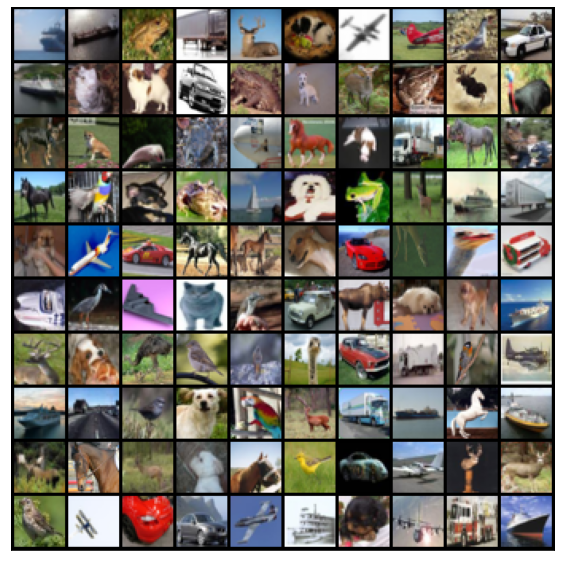

In [18]:
show_batch(train_dl)

In [19]:
# do not shuffle the data in time series analysis

import torch.nn as nn
import  torch.nn.functional as F



In [20]:
?nn.Conv2d
# stride 1 (moving size of kernal)
# keranl size 3,3



In [21]:
simple_model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1), #layer 3 channels to 8 channels
    nn.MaxPool2d(2,2)

)

In [22]:
for images,labels in train_dl:
  print('images.shape',images.shape)
  out = simple_model(images)
  print("shape of out",out.shape)
  break

images.shape torch.Size([100, 3, 32, 32])
shape of out torch.Size([100, 8, 16, 16])


In [23]:
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),# output  16 ,16,16
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2), # 1st layer


    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),# output 16,8,8
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),


    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1), # output 16,4,4
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),


    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),  # output 16,2,2
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1), # output 16,1,1
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),


    nn.Flatten(),
    nn.Linear(16,10)



)

In [24]:
model[0].weight.shape   # 3 by 3 matrix 3 channels  total 16

torch.Size([16, 3, 3, 3])

In [25]:
model[3].weight.shape

torch.Size([16, 16, 3, 3])

In [26]:
for images,labels in train_dl:
  print('images shape',images.shape)
  out=model(images)
  print('out shape ',out.shape)
  print('out[0]',out[0])
  break



images shape torch.Size([100, 3, 32, 32])
out shape  torch.Size([100, 10])
out[0] tensor([ 0.0923, -0.2402, -0.1938, -0.0390, -0.0064, -0.0640,  0.1157, -0.1223,
         0.2000, -0.0528], grad_fn=<SelectBackward0>)


In [27]:
F.softmax(out[0]) # interpretated as probability 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.1122, 0.0804, 0.0843, 0.0984, 0.1016, 0.0959, 0.1148, 0.0905, 0.1249,
        0.0970], grad_fn=<SoftmaxBackward0>)

In [28]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [29]:
device =get_default_device()
device

device(type='cuda')

In [30]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl = DeviceDataLoader(train_dl,device)
to_device(model,device)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU()
  (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (12): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Flatten(start_dim=1, end_dim=-1)
  (16): Linear(in_features=16, out_features=10, bias=True)
)

In [31]:
# Train model
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):
  # generate prediction
  preds= model(xb)
  # calculate loss
  loss=loss_func(preds,yb)
  if  opt is not None:
    # compute gradient
    loss.backward()
    # update parameter
    opt.step()
    # reset gradient
    opt.zero_grad()

  metric_result= None
  if metric is not None:
    metric_result = metric(preds,yb)
  
  return loss.item(),len(xb),metric_result

In [32]:
def evaluate(model,loss_fn,valid_dl,metric=None):
  with torch.no_grad():
    # pass each batch throught  model
    results= [loss_batch(model,loss_fn,xb,yb,metric=metric)# calculate losses from each batch
    for xb,yb in valid_dl]

    # separate loss, count, metrics
    losses,nums,metrics=zip(*results)
    # total size of the dataset
    total=np.sum(nums)
    # avg loss across batches
    avg_loss = np.sum(np.multiply(losses,nums))/total
    avg_metric=None
    if metric is not None:
      # avg of  metric across  batches
      avg_metric=np.sum(np.multiply(metrics,nums))/total

    return avg_loss,total,avg_metric


In [33]:

def fit(epochs,model,loss_fn,train_dl,valid_dl,opt_fn=None,lr=None,metric=None):
  train_losses,val_losses,val_metrics=[],[],[]
  # instantial optimizer
  if opt_fn is None: opt_fn=torch.optim.SGD
  opt=opt_fn(model.parameters(),lr=lr)

  for epoch in range(epochs):
    # training
    model.train()
    for xb,yb in train_dl:
      train_loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)

    # evaluation
    model.eval()
    result= evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result

    # record lose  and metric
    train_losses.append(train_loss) # we make record after we can plot graph
    val_losses.append(val_loss)
    val_metrics.append(val_metric)
    
    if metric is None:
      print('epoch [{}/{}],train_Loss:{:.4f},val_loss:{:.4f}'.format(epoch+1,epochs,train_loss,val_loss))
    else:
      print("epoch [{}/{}],train_loss:{:.4f},val_loss:{:.4f},val_{}:{:.4f}".format(epoch+1,epochs,train_loss,val_loss,metric.__name__,val_metric))
  return train_losses,val_losses,val_metrics



In [34]:
def accuracy(outputs,labels): # function to calculate accuracy
  _,preds =torch.max(outputs,dim=1)
  return torch.sum(preds==labels).item() / len(preds)


In [35]:
val_loss,_,val_acc = evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
print("Loss :{:.4f}, accuracy:{:.4f}".format(val_loss,val_acc))

Loss :2.3108, accuracy:0.1011


In [36]:
# hyperparameter is learning rate, batch size and number of 
# epochs we can do have a parameter to increase the accuracy
num_epochs=10
opt_fn=torch.optim.Adam
lr=0.005

In [37]:
# jovian keep track of hyperparameter
history=fit(num_epochs,model,F.cross_entropy,train_dl,valid_dl,opt_fn,lr,accuracy)
train_losses,val_losses,val_metrics=history

epoch [1/10],train_loss:1.7669,val_loss:1.5841,val_accuracy:0.4131
epoch [2/10],train_loss:1.4238,val_loss:1.4666,val_accuracy:0.4574
epoch [3/10],train_loss:1.4098,val_loss:1.4141,val_accuracy:0.4827
epoch [4/10],train_loss:1.4509,val_loss:1.2932,val_accuracy:0.5304
epoch [5/10],train_loss:1.2262,val_loss:1.2216,val_accuracy:0.5511
epoch [6/10],train_loss:1.2362,val_loss:1.1480,val_accuracy:0.5870
epoch [7/10],train_loss:1.2172,val_loss:1.1490,val_accuracy:0.5897
epoch [8/10],train_loss:1.2174,val_loss:1.1379,val_accuracy:0.5952
epoch [9/10],train_loss:1.1555,val_loss:1.1536,val_accuracy:0.5901
epoch [10/10],train_loss:1.3188,val_loss:1.0737,val_accuracy:0.6182


In [38]:
torch.save(model.state_dict(),'mnist-cnn.pth') # Saving model to reuse some time

In [ ]:
# reload model 
# model2=MnistModel()
# model2.load_state_dict(torch.load('mnist-logistic.pth')) # PATH
# model2.state_dict()

In [39]:
def plot_metric(metric_values):
  """plot  metric values  in line graph"""
  plt.plot(metric_values,'-x')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.title('accuracy vs no of epochs')
  

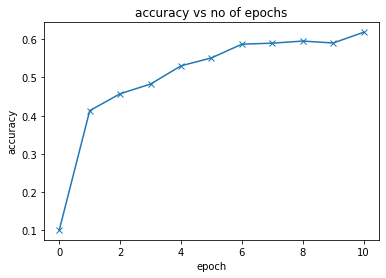

In [44]:
plot_metric([val_acc]+val_metrics)


In [46]:
# plot graph for losses


def plot_losses(train_losses,val_losses):
  plt.plot(train_losses,'-x')
  plt.plot(val_losses,'-o')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['Training','Validation'])
  plt.title('loss vs  no of epochs')

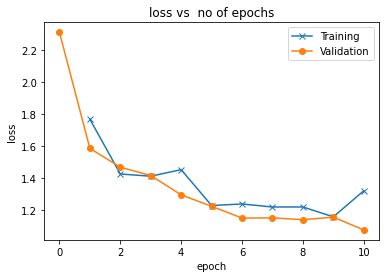

In [47]:
plot_losses([None]+train_losses,[val_loss]+val_losses)

In [48]:
# graph of training data is always decreasing but the graph of 
#   validation data is decreasing and then after sometime increasing it is due to the overfitting


# use to prevent overfiting 
# data augmentation it is fake data is generated from the existing data
# adding some noise stretching the images changing the size of the image turning the images


In [49]:
test_dataset = ImageFolder(data_dir + '/test',transform=ToTensor()) # convt to tensor


In [52]:
def predict_image(img,model):
  # convert batch of 1
  xb=img.unsqueeze(0) # covt 3,32,32 to 1,3,32,32  # r model can work with batches of data
  # get prediction from model
  yb=model(xb.to(device))
  # index with high probability
  _,preds = torch.max(yb,dim=1)
  # retrieve class label
  return dataset.classes[preds[0].item()]


Label airplane Predict: airplane


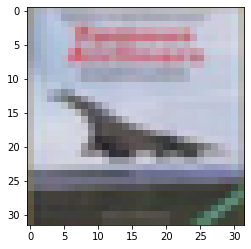

In [53]:
img,label=test_dataset[0]
plt.imshow(img.permute(1,2,0))
print("Label",dataset.classes[label],'Predict:',predict_image(img,model))

Label automobile Predict: automobile


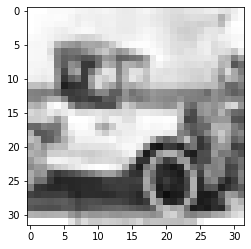

In [54]:
img,label=test_dataset[1002]
plt.imshow(img.permute(1,2,0))
print("Label",dataset.classes[label],'Predict:',predict_image(img,model))

Label frog Predict: frog


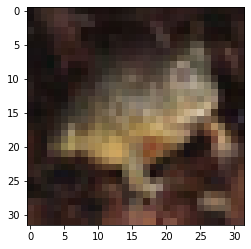

In [55]:
img,label=test_dataset[6153]
plt.imshow(img.permute(1,2,0))
print("Label",dataset.classes[label],'Predict:',predict_image(img,model))

In [56]:
test_loader = DeviceDataLoader(DataLoader(test_dataset,batch_size),device)

test_loss,_,test_acc = evaluate(model,F.cross_entropy,test_loader,metric= accuracy)
print('Loss:{:.4f},accuracy : {:.4f}'.format(test_loss,test_acc))

Loss:1.1570,accuracy : 0.5860


In [57]:
# save model
torch.save(model.state_dict(),'cifar10-cnn.pth')

In [58]:
model2 = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3,stride=1,padding=1),# output  16 ,16,16
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2), # 1st layer


    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),# output 16,8,8
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),


    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1), # output 16,4,4
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),


    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1),  # output 16,2,2
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,16,kernel_size=3,stride=1,padding=1), # output 16,1,1
    nn.ReLU(), # activation eliminate the minus value to 0
    nn.MaxPool2d(2,2),


    nn.Flatten(),
    nn.Linear(16,10)



)

In [59]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

<All keys matched successfully>

In [60]:
# sanity check  model have same accuracy and loss
test_loss,_,test_acc =evaluate(to_device(model2,device),F.cross_entropy,test_loader,metric =accuracy)
print('Loss :{:.4f},  Accuracy : {:.4f}'.format(test_loss,test_acc))

Loss :1.1570,  Accuracy : 0.5860


In [ ]:
#  if you could have a logic of 3 to 4 lines  make it a function